# ELECTRE III

## Autorzy
- Daniel Zdancewicz [145317]
- Alex Terentowicz [145419]


### Opis zbioru danych

Zbiór danych wykorzystany w raporcie to "[AI Global Index](https://www.tortoisemedia.com/intelligence/global-ai/)", tworzący ranking państw względem ich adopcją sztucznej inteligencji.

Kolumny, które tworzą zbiór to:
- `Talent` — Wskaźnik dostępności naukowców, którzy są w stanie prowadzić badania sztucznej inteligencji przez państwo.
- `Infrastructure` — Wskaźnik gotowości infrastruktury państwowej na przyjęcie sztucznej inteligencji.
- `Operating Environment` — Wskaźnik zainteresowania i opinii publicznej o sztucznej inteligencji.
- `Research` — Wskaźnik zainteresowania wspomaganiem badań przez państwo.
- `Development` — Wskaźnik rozwoju państwa.
- `Government Strategy` — Wskaźnik udziału państwa w adopcji sztucznej inteligencji w państwie.
- `Commercial` — Wskaźnik udziału sektora usług w ekonomii państwa.
- `Total Score` — Wynik wspólny państwa (Służy tylko do porównania otrzymanego rankingu).
- `Region` — Region świata, w którym znajduje się państwo.
- `Cluster` — Rodzaj państwa, do którego zalicza względem jego stanu rozwoju.
- `Income Group` — Grupa państwa względem jego przychodu.
- `Politcal regime` — Polityka państwa.

W raporcie kolumna `Total Score` służy do sprawdzenia, jak metoda `ELECTRE III` sprawdza się przy odwzorowywaniu rankingu.

#### 1. Jaka jest domena problemu?
Domeną problemu jest adopcja sztucznej inteligencji przez różne państwa i tworzenie rankingu na podstawie różnych wskaźników związanych z tym zagadnieniem.

#### 2. Jakie jest źródło danych?

Źródła danych:
- Artykuł badawczy — [https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/](https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/)
- Punkt pochodzenia wskaźników — [https://www.tortoisemedia.com/intelligence/global-ai/](https://www.tortoisemedia.com/intelligence/global-ai/)
- Miejsce dostępu do danych — [https://www.kaggle.com/datasets/katerynameleshenko/ai-index/](https://www.kaggle.com/datasets/katerynameleshenko/ai-index/)
- Licencja zbioru danych (ODC | Open Data Commons) — [https://opendatacommons.org/licenses/dbcl/1-0/](https://opendatacommons.org/licenses/dbcl/1-0/)

#### 3. Jaki jest punkt widzenia decydenta?
Decydent ma na celu ocenie adopcji sztucznej inteligencji w Litwie.

#### 4. Jaka jest liczba rozważanych wariantów? Czy w oryginalnym zbiorze danych było ich więcej?
Rozpatrujemy $62$ warianty, w oryginalnym zbiorze jest ich również tyle samo.

#### 5. Opisz jeden z rozważanych wariantów - jak jest oceniony na poszczególnych kryteriach, jak dobry jest na tle innych.
Jeden z rozważanych wariantów wraz z wartościami wskaźników. Estonia, jako wariant charakteryzuje stosunkowo średnie/słabe oceny na wszystkich kryteriach, przez co można wysunąć stwierdzenie, że państwo nie jest preferowane względem behemotów takich jak Chiny czy Stany, ale nie jest tak źle, jak w Kenii.

Estonia:
- `Talent` — 18.74
- `Infrastructure` — 63.65.
- `Operating Environment` — 88.67.
- `Research` — 11.75.
- `Development` — 9.31.
- `Government Strategy` — 72.08.
- `Commercial` — 12.51.
- `Total Score` — 26.6.
- `Region` — Europe.
- `Cluster` — Waking up.
- `Income Group` — High.
- `Political regime` — Liberal democracy.

In [1]:
from pandas import read_csv
dataset = read_csv('./resources/datasets/ai-index.csv', index_col="Country")

dataset.loc[['Kenya', 'Estonia', 'United States of America', 'China']]

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
Country,,,,,,,,,,,,
Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
Estonia,18.74,63.65,88.67,11.75,9.31,72.08,12.51,26.60,Europe,Waking up,High,Liberal democracy
United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy


#### 6. Ile rozwazasz kryteriów? Czy było ich więcej w oryginalnym zbiorze danych?
Rozpatrywana są wszystkie wskaźniki.

- `Talent`.
- `Infrastructure`.
- `Operating Environment`.
- `Research`.
- `Development`.
- `Government Strategy`.
- `Commercial`.

W wykorzystywanym zbiorze oryginalnie wykorzystano wszystkie dostępne kolumny.

#### 7. Jakie są typy poszczególnych kryteriów? Scharakteryzuj je pod kątem: ciągłe/dyskretne, typu zysk/koszt, osiągane wartości.

| Wskaźnik                | Ciągłość | Typ  | Wartości    |
|-------------------------|----------|------|-------------|
| `Talent`                | ciągłe   | zysk | [0.0-100.0] |
| `Infrastructure`        | ciągłe   | zysk | [0.0-100.0] |
| `Operating Environment` | ciągłe   | zysk | [0.0-100.0] |
| `Research`              | ciągłe   | zysk | [0.0-100.0] |
| `Development`           | ciągłe   | zysk | [0.0-100.0] |
| `Government Strategy`   | ciągłe   | zysk | [0.0-100.0] |
| `Commercial`            | ciągłe   | zysk | [0.0-100.0] |


#### 8. Jakie są wagi poszczególnych kryteriów?
Kryteria według prefencji nie są równie istotne, wagi, które zostały przyjęte to:

| Wskaźnik                | Waga |
|-------------------------|------|
| `Talent`                | 5.0  |
| `Infrastructure`        | 2.0  |
| `Operating Environment` | 1.0  |
| `Research`              | 5.0  |
| `Development`           | 5.0  |
| `Government Strategy`   | 1.0  |
| `Commercial`            | 7.0  |

Ważny jest talent, badania i rozwój państwa, najważniejsza jest możliwości zmonetyzowania sektora usług. Jak jest zarządzane państwo czy jego polityka nie ma
wielkiego znaczenia.

#### 9. Czy istnieją jakieś dominacje w zbiorze wariantów? Jeśli tak, podaj je.

Kenia przez Chiny, Stany itp.

In [2]:
dataset.loc[["Kenya", "China", 'United States of America']]

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
Country,,,,,,,,,,,,
Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy


#### 10. Jak teoretycznie powinien prezentować się najlepszy wariant w Twoim zbiorze danych?
Tak jak opisano w wagach, ważny jest talent, badania i rozwój państwa i najważniejsza jest możliwości zmonetyzowania sektora usług. Jak jest zarządzane państwo czy jego polityka nie ma wielkiego znaczenia.

#### 11. Spośród rozważanych wariantów, który wydaje się być najlepszy/lepszy od innych i dlaczego?
Chiny i Stany według wskaźników i naszych wag. Chiny/Stany może mają beznadziejne formy rządów, ale dostęp do talentu i silny market nadrabia inne problemy.

#### 12. Sposród rozważanych wariantów, który wydaje się być najsłabszy/znacząco słabszy od innych i dlaczego?
Kenia, jest biedna, nie ma zbyt dużego marketu, który by nas interesował.

In [3]:
dataset.loc[["Kenya"]]

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
Country,,,,,,,,,,,,
Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.3,Africa,Nascent,Lower middle,Electoral autocracy


### Analiza problemu z wykorzystaniem ELECTRE III


#### Obligatoryjne importy

In [4]:
import electre3
import numpy as np

#### Informacja preferencyjna podana na wejście metody

Jako informację preferencyjną przyjęto dla wskaźników:
- P = 20% — progi preferencji | preferences
- Q = 1.5% — progi nierozróżnialności | indifference
- V = 40% — progi veta | veotes
- W = zgodnie z tabelką — wagi kryteriów | weights

In [5]:
criteria = [
  'Talent',
  'Infrastructure',
  'Operating Environment',
  'Research',
  'Development',
  'Government Strategy',
  'Commercial',
]
criteria_count = len(criteria)
preferences = [15] * criteria_count
indifferences = [1.5] * criteria_count
vetoes = [40] * criteria_count
weights = [5.0, 2.0, 1.0, 5.0, 7.0, 1.0, 3.0]

df = dataset[criteria]

#### Electre III

Na grafie widać ranking, ranking jest podany w tabeli Alex opisz pls umieram

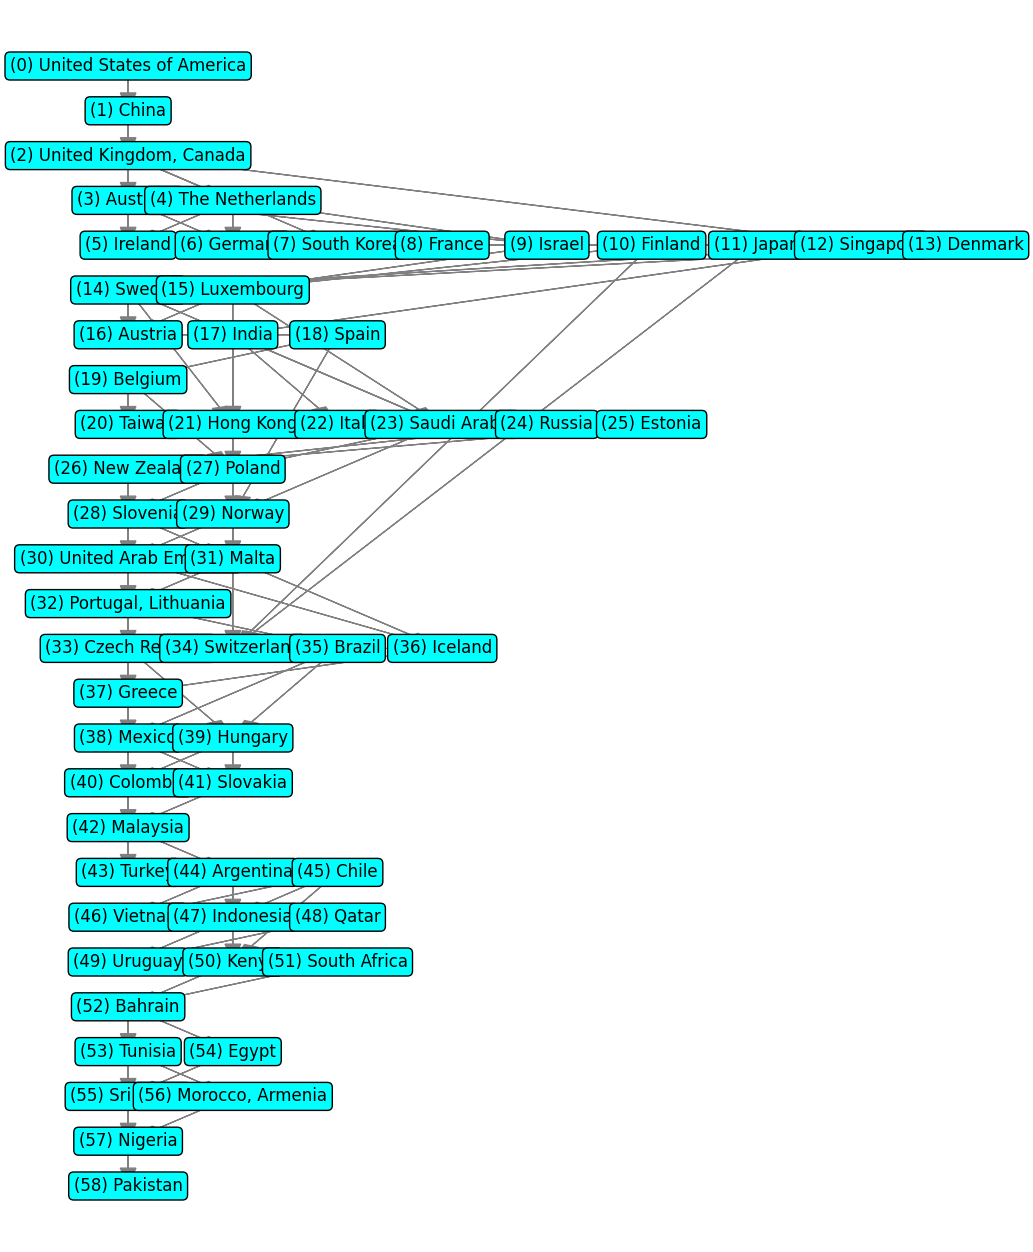

array([[' ', '+', '+', ..., '+', '+', '+'],
       ['-', ' ', '+', ..., '+', '+', '+'],
       ['-', '-', ' ', ..., '+', '+', '+'],
       ...,
       ['-', '-', '-', ..., ' ', '+', '+'],
       ['-', '-', '-', ..., '-', ' ', '+'],
       ['-', '-', '-', ..., '-', '-', ' ']], dtype='<U1')

In [6]:
ranking, rank_final, rank_median = electre3.perform(
  df,
  preferences,
  indifferences,
  vetoes,
  weights
)

ranking

In [9]:
for (rank, alternative) in enumerate(rank_median):
  print(f"{rank:0>2}: {dataset.index[alternative]}")

00: United States of America
01: China
02: United Kingdom
03: Canada
04: Australia
05: The Netherlands
06: Ireland
07: Germany
08: South Korea
09: France
10: Israel
11: Finland
12: Japan
13: Singapore
14: Denmark
15: Sweden
16: Luxembourg
17: Austria
18: India
19: Spain
20: Belgium
21: Taiwan
22: Hong Kong
23: Italy
24: Saudi Arabia
25: Russia
26: Estonia
27: New Zealand
28: Poland
29: Slovenia
30: Norway
31: United Arab Emirates
32: Malta
33: Portugal
34: Lithuania
35: Czech Republic
36: Switzerland
37: Brazil
38: Iceland
39: Greece
40: Mexico
41: Hungary
42: Colombia
43: Slovakia
44: Malaysia
45: Turkey
46: Argentina
47: Chile
48: Vietnam
49: Indonesia
50: Qatar
51: Uruguay
52: Kenya
53: South Africa
54: Bahrain
55: Tunisia
56: Egypt
57: Sri Lanka
58: Morocco
59: Armenia
60: Nigeria
61: Pakistan


### Wnioski